In [39]:
import numpy as np
import polars as pl

In [53]:
data = pl.read_excel("iris_data.xlsx")
data.head()

A,B,C,D,Label
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Iris-setosa"""
4.9,3.0,1.4,0.2,"""Iris-setosa"""
4.7,3.2,1.3,0.2,"""Iris-setosa"""
4.6,3.1,1.5,0.2,"""Iris-setosa"""
5.0,3.6,1.4,0.2,"""Iris-setosa"""


In [54]:
y_train = np.array(data.drop_in_place("Label").to_dummies().rows())
y_train = [[1 if i > 0 else -1 for i in array] for array in y_train]

x_train = np.array([row for row in data.rows()])

In [42]:
def z_score(x):
    return (x - np.mean(x)) / np.std(x)

In [43]:
x_train = z_score(x_train)

In [44]:
import mlp

model = mlp.NeuralNetwork(
    mlp.Layer(4, 12, mlp.Tanh()),
    mlp.Layer(12, 3, mlp.Tanh()),
)
model.fit(x_train, y_train, batch_size=3, epochs=2_000, alpha=0.05, print_mse=True)

Processing... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:10

In [45]:
mlp.evaluate(model, x_train, y_train, total=150)

97.33333333333334

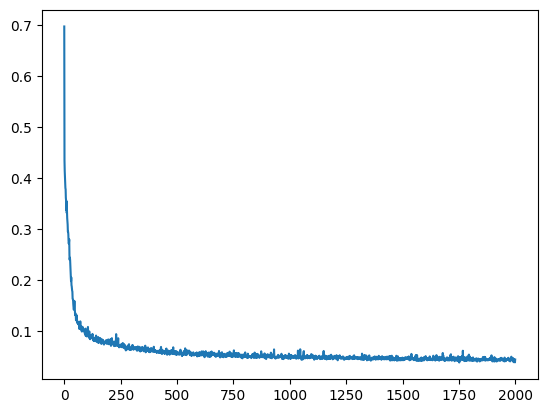

In [46]:
import matplotlib.pyplot as plt

plt.plot(model.all_mse);

In [62]:
import mlp_no_suffle as mlp

model = mlp.NeuralNetwork(
    mlp.Layer(4, 12, mlp.Tanh()),
    mlp.Layer(12, 3, mlp.Tanh()),
)
model.fit(x_train, y_train, batch_size=1, epochs=3_000, alpha=0.05, print_mse=True)

Processing... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:12

In [63]:
mlp.evaluate(model, x_train, y_train, total=150)

97.33333333333334

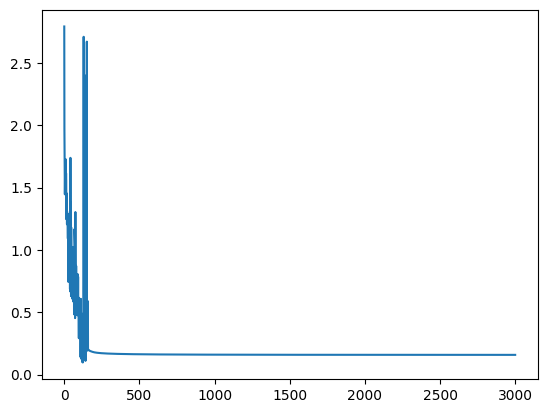

In [64]:
import matplotlib.pyplot as plt

plt.plot(model.all_mse);